# Clase 6 - Filtros

## Respuesta en frecuencia

La Respuesta en Frecuencia o Función Transferencia de un sistema se define como:

\begin{equation}\label{Ec1}
    H(jw) = \frac{Y(jw)}{X(jw)}
\end{equation}

Cuando un sistema lineal, definido por H(jω), es alimentado por una sinusoide, la salida es también una sinusoide a la misma frecuencia que la de la excitación pero, en principio, con amplitud y fase distinta a la de la sinusoide de entrada. Matemáticamente será:

$x(t)=Ax∗cos(wxt+θx)$ 

$y(t)=Ax|H(jwx)|cos(wxt+θx+arg(H(jwx))$

A modo de ejemplo, imaginemos que tenemos un sistema lineal con 

\begin{equation}
    H(jw) = \frac{1000}{2000 + jw}
\end{equation}

Necesitamos determinar la magnitud y la fase de $H(2000)$

\begin{equation}
    |H(2000)| = \frac{1000}{|2000 + jw|} = 0.35
\end{equation}

\begin{equation}
    arg(H(2000))=-0.78 rad= -45°
\end{equation}

Entonces la sinusoide a la salida sería

\begin{equation}
    y(t) = 0.35 \cdot cos(2000 \cdot t-0.78) = 0.35 \cdot cos(2000 \cdot t-45°)
\end{equation}

In [7]:
import numpy as np

w = 2000
num = 1000
den = complex(2000, w)
                
mag_num = 1000
mag_den = np.sqrt(2000**2 + 2000**2)

mod = mag_num/mag_den
print(f'Magnitud H(jw): {mod}')

fase_num = np.angle(num)
fase_den = np.angle(den)
fase = fase_num -fase_den
print(f'Fase de H(jw): {fase}')

Magnitud H(jw): 0.35355339059327373
Fase de H(jw): -0.7853981633974483


## Filtros analógicos

En el área de comunicaciones, el análisis en el dominio de la frecuencia es fundamental. El contenido en frecuencia de una cierta transmisión resulta ser la característica más importante de la misma. Por ejemplo, si queremos sintonizar una emisora determinada como FM 99.9, sabemos que, de alguna forma, debe haber una selección de la banda de interés. Esta selección se le conoce también como filtraje y son los filtros los dispositivos que lo logran. Los filtros se representan con su función transferencia $H(jω)$ o $H(f)$, la cual es compleja y se puede expresar en base a su magnitud y su fase.

\begin{equation}
    H(jω) = |H(jω)|e^{j(arg{H(jω)})} 
\end{equation}


Los filtros ideales tienen magnitud constante no nula en la banda pasante (o banda de frecuencias de la señal de entrada que permite el filtro pasar a la salida) y nula fuera de esta, tal y como se muestra en la Figura 1.

![filtros_ideales](imagenes/filtros_ideales.png)

**Figura 1**. Respuestas en frecuencia de filtros ideales
a) Pasabajo; b) Pasaalto c) Pasabanda y d) Eliminabanda.



Por otra parte la fase de un filtro ideal, como se puede demostrar usando propiedades de la Transformada de Fourier,  debe variar linealmente con la frecuencia para evitar distorsiones en la señal de salida, es decir:

\begin{equation}
    arg H(jω) =-αω+kπ
\end{equation}


En la práctica es imposible conseguir las características de magnitud y fase arriba mencionadas, ya que eso estaría asociado a filtros no causales, es decir sistemas que responden antes de que sean excitados. Por ejemplo, las transiciones de la Magnitud de H(f) en los filtros reales son más suaves como puede observarse en la Figura 2:

![filtros_reales](imagenes/filtro_real.png)

**Figura 2**. Respuestas en frecuencia de filtros reales.
 a) Pasabajo; b) Pasaalto c) Pasabanda y d) Eliminabanda.


En la práctica se emplean ciertos tipos de respuestas típicas asociadas a filtros llamados **Butterworth**, **Chebyshev I y II** (Chebyshev Inverso), **Elípticos** o **Bessel**. En la Figura 4 se observan modelos de respuestas pasabajo para cada uno: El Butterworth se caracteriza por tener respuesta en frecuencia plana en la banda pasante y una zona de transición regular; el Chebyshev I tiene una zona de transición más estrecha pero presenta rizado o ripple en la banda pasante; el Chebyshev II o inverso tiene el rizado o ripple en la banda de rechazo; los filtros elípticos son los que logran una banda de transición más abrupta pero a cambio presentan rizado tanto en la banda pasante como en la banda de rechazo.

![tipo_filtro](imagenes/tipo_filtros.png)

**Figura 3.** Respuesta en frecuencia de filtros pasabajo
tipo Butterworth, Chebyshev I y II y Elíptico


Para diseñar un filtro analógico primero hay que definir las condiciones que debe cumplir el filtro: Estas especificaciones tienen que ver con las frecuencias de las bandas de paso y de rechazo, las ganancias en cada banda, el máximo rizado permitido en dichas bandas y, en algunos casos, la frecuencia de corte donde la potencia cae a la mitad (o potencia de 3 dB). En la Figura 5 se observa la respuesta general de un filtro pasabajo en la cual se definen las ganancias, bandas y frecuencias de interés. Las ganancias, generalmente, se representan en forma logarítmica pero también se pueden expresar en forma lineal tal como en esta misma figura. En este caso se trata de filtros llamados pasivos en los cuales la máxima ganancia que ocurre (en la banda pasante) es unitaria. 
La respuesta en frecuencia de los filtros analógicos de orden n puede expresarse como una relación entre dos polinomios de (jω) como sigue:


\begin{equation}
    H(jw) = \frac{b_1(jw)^n + b_2(jw)^{n-1}+..+b_{n+1}}{(jw)^n + a_2(jw)^{n-1}+..+a_{n+1}}
\end{equation}

**Donde** las constantes $b_i$ y $a_i$ definen la naturaleza del filtro.

![](imagenes/bandas_filtros.png)

**Figura 5.** Respuesta en frecuencia general de un filtro Pasa-bajos
Sin embargo, cuando se trabaja en un computador,  hay que digitalizar, es decir, muestrear y cuantificar los valores de las funciones (señales o características de los sistemas). En este caso, realmente estaríamos trabajando con filtros digitales. La respuesta en frecuencia de un filtro de orden n  puede expresarse como una relación entre dos polinomios de (jω)

En Python se pueden diseñar filtros Butterworth o Chebyshev muy fácilmente: Por ejemplo, si quiere diseñar un filtro Butterworth pasabajo de orden 2 y frecuencia de corte de 30 Hz, con frecuencia de muestreo es 240 Hz, se puede usar las siguientes funciones para diseñar filtros del paquete **signal** de **scipy**.



In [8]:
from scipy import signal
import matplotlib.pyplot as plt
import numpy as np

fs = 240  # frecuencia de muestreo
fc =30   # frecuencia de corte del filtro
fc = fc/(0.5*fs)   # frecuencia de corte normalizada
N = 5  # orden del filtro
# se calculan los coeficientes del un filtro pasabajo (btype='low')
[b,a] = signal.butter(N, fc, btype='low') 

Cuando se revisan los valores de las constantes b y de a se observa:

In [9]:
print(b)
print(a)

[0.00327922 0.01639608 0.03279216 0.03279216 0.01639608 0.00327922]
[ 1.         -2.47441617  2.81100631 -1.70377224  0.54443269 -0.07231567]


Luego se usa la función `freqz` para obtener $H$ complejo y su vector de frecuencia $wn$ (esta va entre 0 y π como lo hacen las frecuencias digitales). Queremos graficar, la magnitud de H en escala logarítmica vs. f en Hz. Hay que convertir la frecuencia `wn` a Hz, multiplicando por $fs/2$ y dividiendo entre π. Para obtener la magnitud se calcula `abs(H)`, mientras que para la fase se determina el `arctan(imag(H),real(H))`

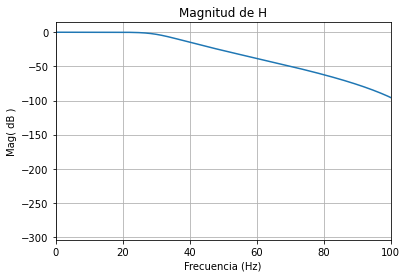

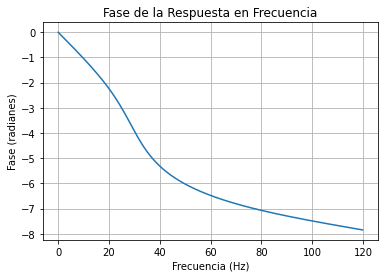

In [16]:
wn, H = signal.freqz(b,a)
f= wn*(0.5*fs)/np.pi
plt.figure ()
# #La magnitud de H se grafica usualmente en forma logarítmica
plt.plot(f, 20 * np.log10(abs(H)))
plt.ylabel('Mag( dB )')
plt.xlabel('Frecuencia (Hz)')
plt.xlim(0, 100)
plt.title('Magnitud de H')
plt.ylabel('Mag( dB )')
plt.grid()
#H_Fase = np.unwrap(np.arctan2(np.imag(H),np.real(H)))
#H_Fase = np.arctan2(np.imag(H),np.real(H))
H_Fase = np.unwrap(np.angle(H))
plt.figure ()
plt.plot(f, H_Fase)
plt.ylabel('Fase (radianes)')
plt.xlabel('Frecuencia (Hz)')
plt.title('Fase de la Respuesta en Frecuencia')
plt.grid()


# Ping o obtención de RI del filtro
Para graficar la respuesta impulsiva se construye un impulso discreto y se hace pasar por el filtro definido por (b,a)

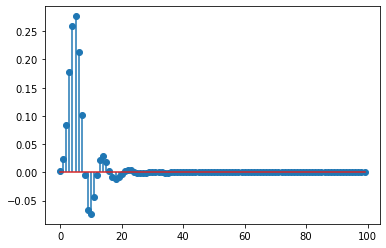

In [17]:
n = np.arange(0,100)
impulse = np.zeros(np.size(n))
impulse[0] =1.
response = signal.lfilter(b, a, impulse)
plt.figure()
plt.stem(n,response[0:100])
plt.show()

# Como genero un filtro que nunca programe?
Ejemplo: Chebyshev I pasabajo con frecuencia de corte en 250 Hz, orden 3, con riple maximo de 2 dB en la banda de paso.

In [18]:
import soundfile as sf
from IPython.display import Audio

audio, fs = sf.read('voice.flac')
Audio(audio, rate=fs)

In [63]:
from scipy.signal import cheby1, freqz, lfilter
orden = 3
ripple = 1
fc = 1000
fc = fc / (fs*0.5)
b, a = cheby1(N = orden, rp = ripple, Wn = fc)

In [71]:
w, h = freqz(b, a, worN=2048)
freq = (w * (fs*0.5))/ np.pi
h_mag = 20*np.log10(abs(h))
h_pha = np.unwrap(np.angle(h))

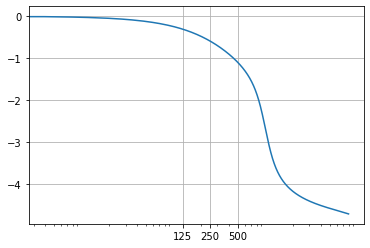

In [72]:
plt.semilogx(freq, h_pha)
plt.xticks([125, 250, 500], [125, 250, 500])
plt.grid()
#plt.ylim(-30, 2)

(-30.0, 2.0)

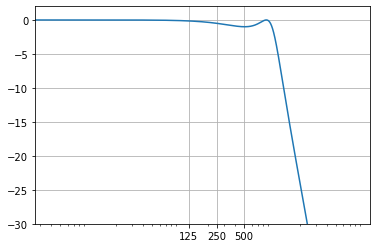

In [65]:
plt.semilogx(freq, h_mag)
plt.xticks([125, 250, 500], [125, 250, 500])
plt.grid()
plt.ylim(-30, 2)

In [66]:
audio_filtrado = lfilter(b, a, audio)

Audio(audio_filtrado, rate=fs)